In [2]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [3]:
import tensorflow as tf; print('tensorflow version: ', tf.__version__)
import keras; print('keras version: ',keras.__version__)

tensorflow version:  1.13.1
keras version:  2.3.1


Using TensorFlow backend.


In [4]:
INPUT_DIR="input/"
# 16 KHz
SAMPLE_RATE = 16000
# seconds
MAX_SOUND_CLIP_DURATION=12   

In [5]:
!pwd
!ls -all input/

/Users/CTR/Desktop/Heart-Beat-Classification/heartbeatclass
total 160
drwxr-xr-x    8 CTR  staff    256 Feb 26 13:42 .
drwxr-xr-x    7 CTR  staff    224 Feb 26 13:43 ..
-rw-r--r--    1 CTR  staff   6148 Feb 26 13:42 .DS_Store
drwxr-xr-x  178 CTR  staff   5696 Feb 26 13:42 set_a
-rw-r--r--@   1 CTR  staff   7031 Feb 26 13:42 set_a.csv
-rw-r--r--@   1 CTR  staff  17115 Feb 26 13:42 set_a_timing.csv
drwxr-xr-x  658 CTR  staff  21056 Feb 26 13:42 set_b
-rw-r--r--    1 CTR  staff  42145 Feb 26 13:42 set_b.csv


In [10]:
set_a=pd.read_csv(INPUT_DIR+"/set_a.csv")
set_a.head()


dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN

In [11]:
set_a_timing=pd.read_csv(INPUT_DIR+"/set_a_timing.csv")
set_a_timing.head()

fname  cycle sound  location
0  set_a/normal__201102081321.wav      1    S1     10021
1  set_a/normal__201102081321.wav      1    S2     20759
2  set_a/normal__201102081321.wav      2    S1     35075
3  set_a/normal__201102081321.wav      2    S2     47244
4  set_a/normal__201102081321.wav      3    S1     62992

In [12]:
set_b=pd.read_csv(INPUT_DIR+"/set_b.csv")
set_b.head()

dataset                                              fname       label  \
0       b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1       b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2       b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3       b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4       b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   

  sublabel  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [13]:
frames = [set_a, set_b]
train_ab=pd.concat(frames)
train_ab.describe()

dataset                                          fname   label  \
count      832                                            832     585   
unique       2                                            832       5   
top          b  set_b/Bunlabelledtest_242_1309197394064_A.wav  normal   
freq       656                                              1     351   

           sublabel  
count           149  
unique            2  
top     noisynormal  
freq            120

In [23]:
nb_classes=train_ab.label.unique()

print("Number of training examples=", train_ab.shape[0], "  Number of classes=", len(train_ab.label.unique()))
print (nb_classes)

Number of training examples= 832   Number of classes= 6
['artifact' 'extrahls' 'murmur' 'normal' nan 'extrastole']


Min samples per category =  19
Max samples per category =  351


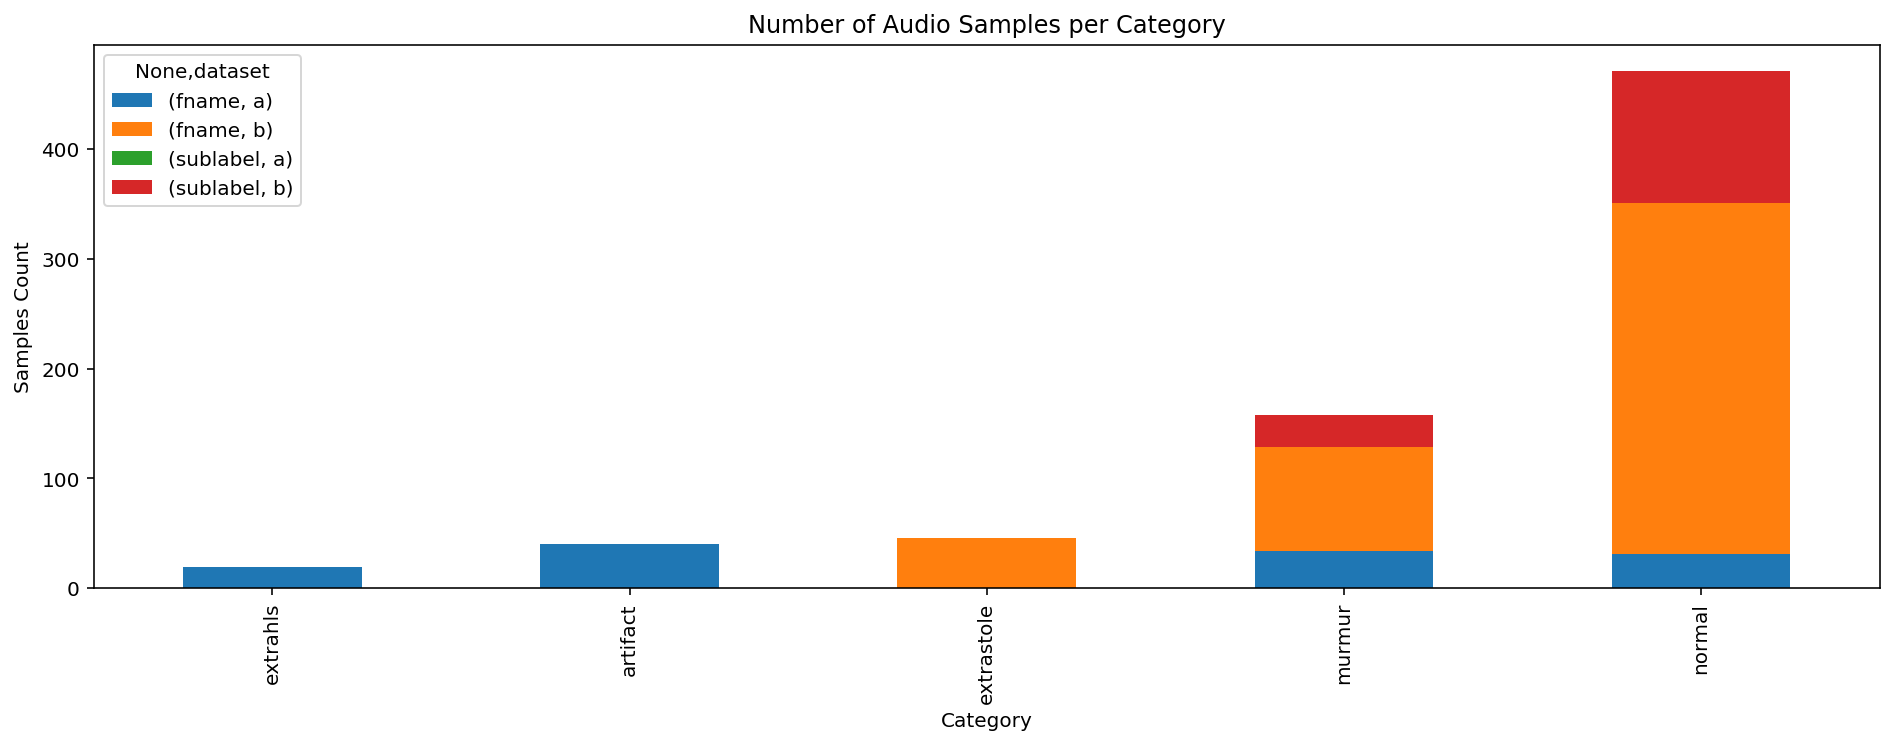

In [76]:
category_group = train_ab.groupby(['label','dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,5))
plot.set_xlabel("Category")
plot.set_ylabel("Samples Count");

print('Min samples per category = ', min(train_ab.label.value_counts()))
print('Max samples per category = ', max(train_ab.label.value_counts()))

In [25]:
print('Minimum samples per category = ', min(train_ab.label.value_counts()))
print('Maximum samples per category = ', max(train_ab.label.value_counts()))

Minimum samples per category =  19
Maximum samples per category =  351


In [26]:
normal_file=INPUT_DIR+"/set_a/normal__201106111136.wav"


In [27]:
# heart it
import IPython.display as ipd
ipd.Audio(normal_file) 

In [28]:
# Load use wave 
import wave
wav = wave.open(normal_file)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  44100
Total samples (frames) =  218903
Duration =  4.963786848072562


In [29]:
# Load use scipy
from scipy.io import wavfile
rate, data = wavfile.read(normal_file)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  44100
Total samples (frames) =  (218903,)
[-22835 -22726 -22595 ...   -474   -450   -439]


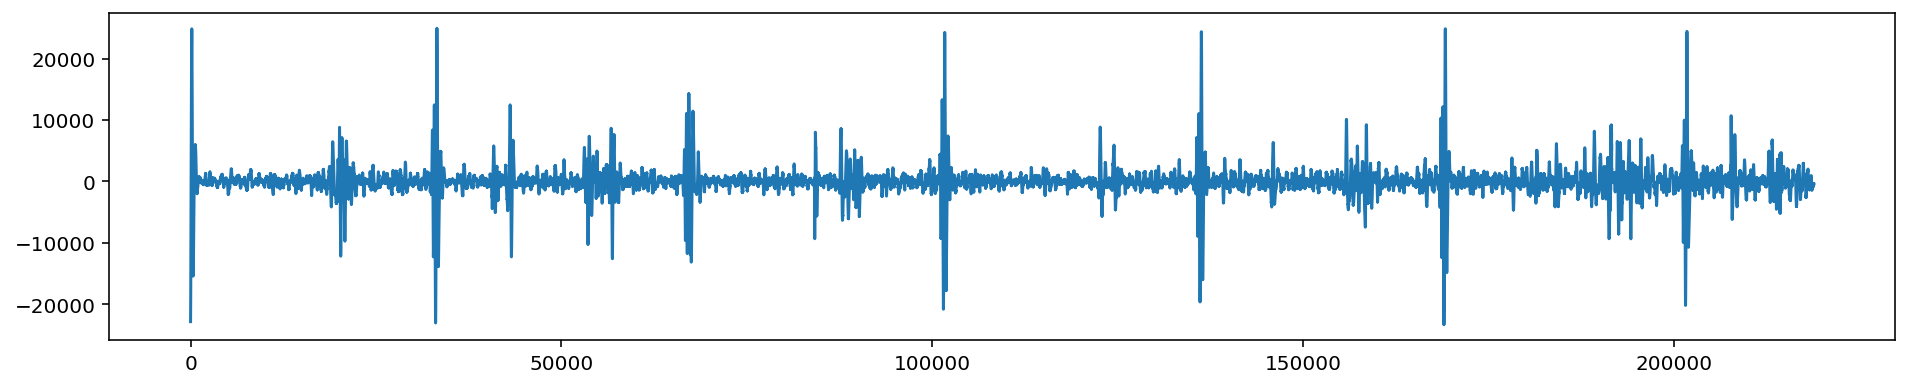

In [30]:
# plot wave by audio frames
plt.figure(figsize=(16, 3))
plt.plot(data, '-', );

In [31]:
# Load using Librosa
y, sr = librosa.load(normal_file, duration=5)   #default sampling rate is 22 HZ
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y.shape, sr)

duration: 4.963809523809524
(109452,) 22050


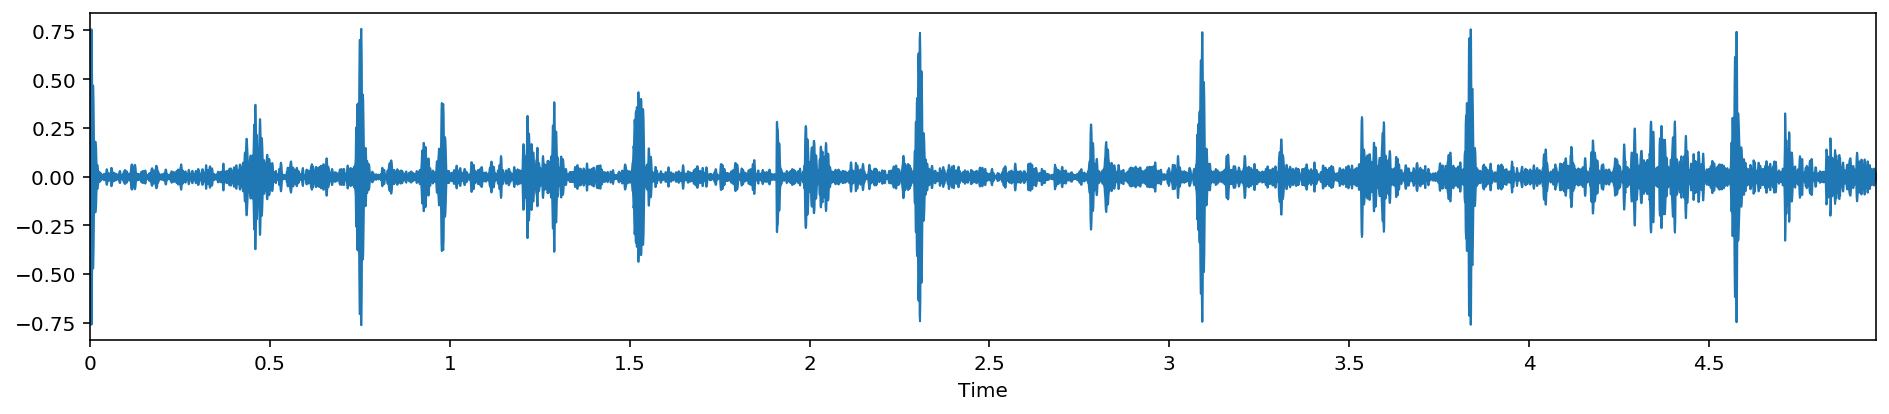

In [32]:
# librosa plot
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y, sr=sr)

In [33]:
# murmur case
murmur_file=INPUT_DIR+"/set_a/murmur__201108222231.wav"
y2, sr2 = librosa.load(murmur_file,duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y2.shape,sr2)

duration: 4.963809523809524
(110250,) 22050


In [34]:
# heart it
import IPython.display as ipd
ipd.Audio(murmur_file) 

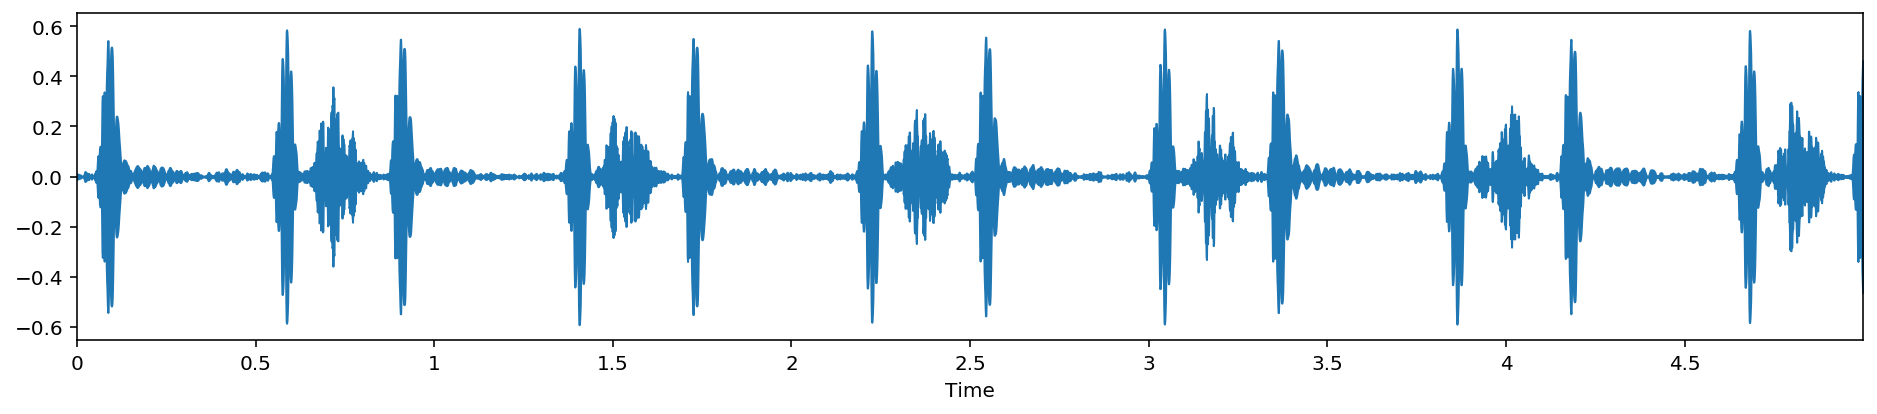

In [35]:
# show it
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y2, sr=sr2)

In [36]:
# Extrasystole case
extrastole_file=INPUT_DIR+"/set_b/extrastole__127_1306764300147_C2.wav"
y3, sr3 = librosa.load(extrastole_file, duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y3.shape,sr3)

duration: 4.963809523809524
(103106,) 22050


In [37]:
# heart it
import IPython.display as ipd
ipd.Audio(extrastole_file) 

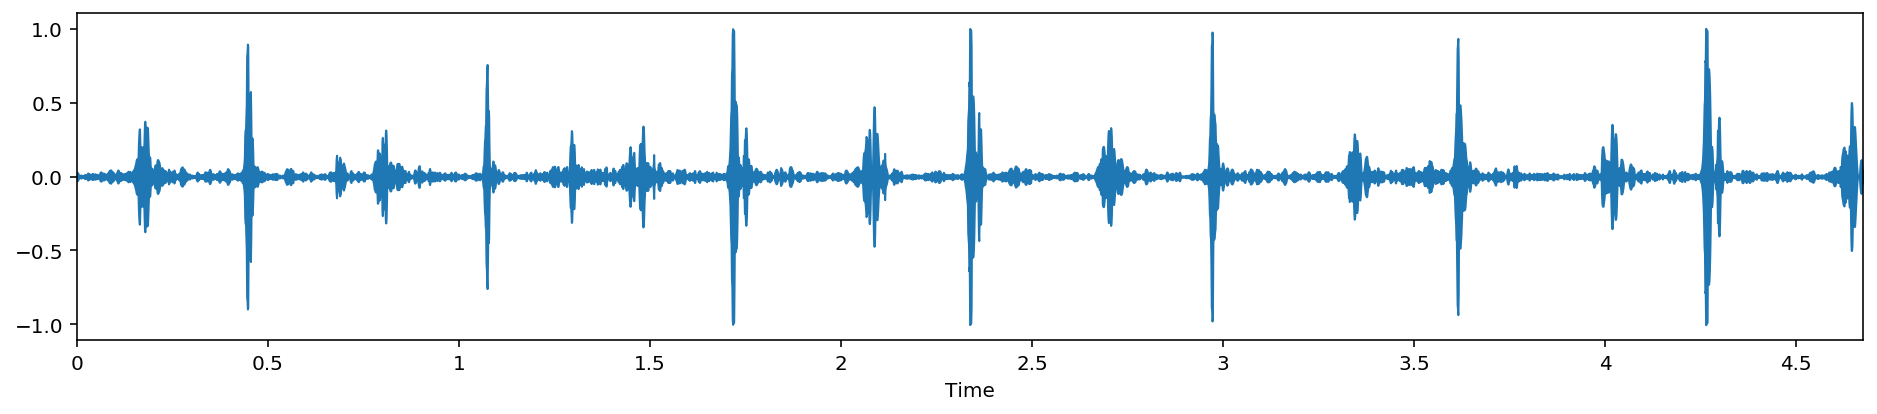

In [38]:
# show it
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y3, sr=sr3)

In [39]:
# sample file
artifact_file=INPUT_DIR+"/set_a/artifact__201012172012.wav"
y4, sr4 = librosa.load(artifact_file, duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y4.shape,sr4)

duration: 4.963809523809524
(110250,) 22050


In [40]:
# heart it
import IPython.display as ipd
ipd.Audio(artifact_file) 

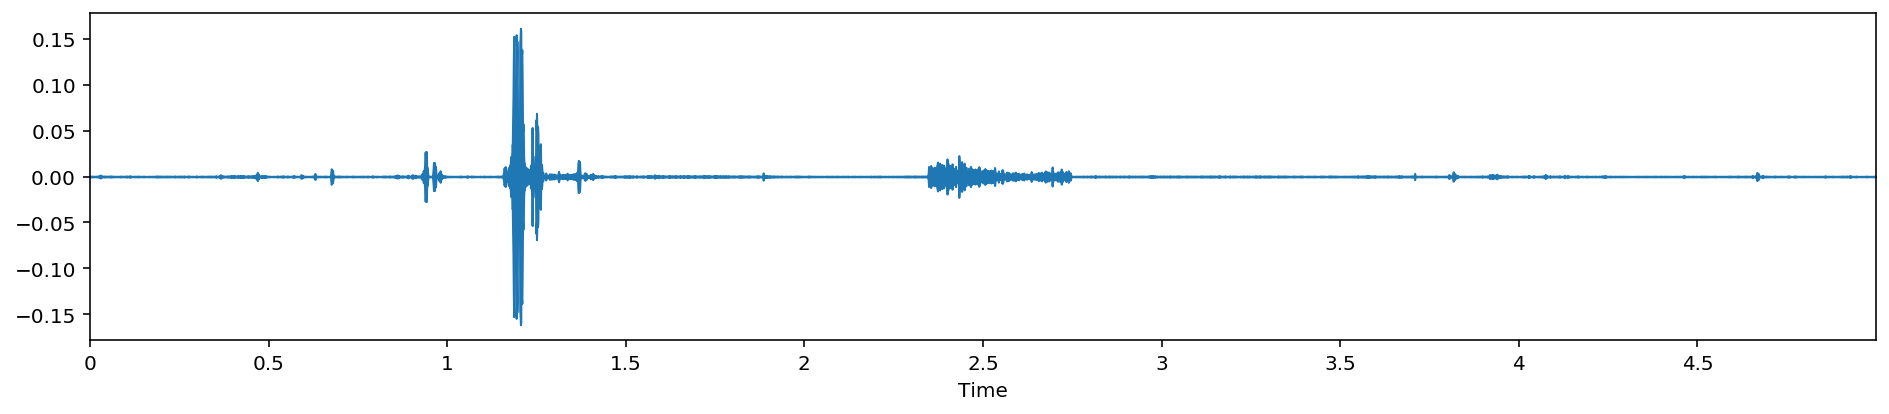

In [41]:
# show it
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y4, sr=sr4)

In [42]:
# sample file
extrahls_file=INPUT_DIR+"/set_a/extrahls__201101070953.wav"
y5, sr5 = librosa.load(extrahls_file, duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y5.shape,sr5)

duration: 4.963809523809524
(110250,) 22050


In [43]:
# heart it
import IPython.display as ipd
ipd.Audio(extrahls_file) 

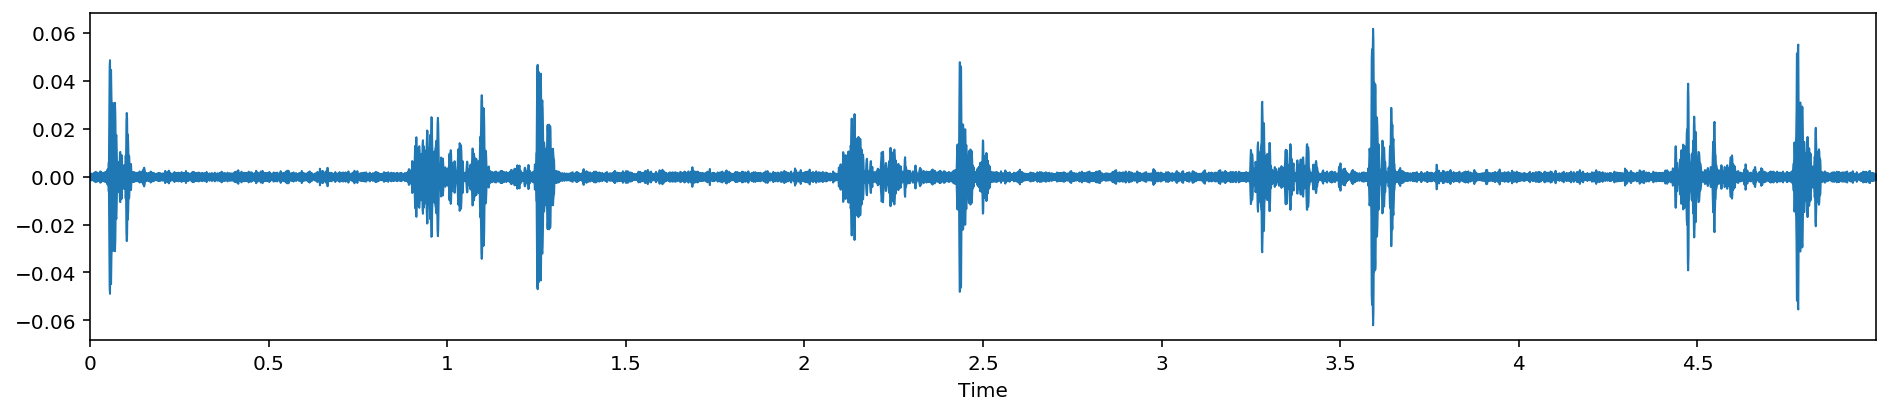

In [44]:
# show it
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y5, sr=sr5)

In [45]:
# Here's a sample generate mfccs from a wave file
normal_file=INPUT_DIR+"/set_a/normal__201106111136.wav"
#y, sr = librosa.load(sample_file, offset=7, duration=7)
y, sr = librosa.load(normal_file)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print (mfccs)

[[-2.45461304e+02 -2.91119141e+02 -4.02448029e+02 ... -3.67871613e+02
  -3.70708405e+02 -3.72469971e+02]
 [ 8.86407013e+01  9.88661346e+01  1.33256516e+02 ...  1.51281036e+02
   1.57261841e+02  1.52452271e+02]
 [ 1.03978905e+02  8.56985016e+01  2.37443180e+01 ...  2.91626701e+01
   2.93766956e+01  3.74462967e+01]
 ...
 [-1.33243303e+01 -8.19430065e+00 -1.18989336e+00 ...  9.66020823e-02
   6.24895334e-01  1.19535053e+00]
 [ 3.16320956e-01 -4.99240756e-01 -1.58858865e-01 ...  2.22770977e+00
  -2.15086460e-01  4.84898758e+00]
 [ 3.34313345e+00 -9.89010930e-01 -2.77108622e+00 ...  2.65077734e+00
  -1.38751090e+00  1.85793996e+00]]


In [46]:
# Use a pre-computed log-power Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
log_S=librosa.feature.mfcc(S=librosa.power_to_db(S))
print (log_S)

[[-2.46578461e+02 -2.89466522e+02 -3.86061401e+02 ... -3.50173584e+02
  -3.51358337e+02 -3.55300598e+02]
 [ 1.09104034e+02  1.16516235e+02  1.30325867e+02 ...  1.49302765e+02
   1.54021423e+02  1.51842590e+02]
 [ 9.83255615e+01  7.55811462e+01  1.59119043e+01 ...  2.06767445e+01
   2.19900379e+01  3.01192207e+01]
 ...
 [ 4.26571465e+00  2.46343464e-01 -2.07913828e+00 ...  2.77263069e+00
  -1.40852916e+00  3.58014035e+00]
 [ 3.38979483e-01 -9.63365853e-01 -3.46149778e+00 ...  1.52364063e+00
   1.05705440e-01 -2.32015753e+00]
 [-5.24993658e+00 -2.43681741e+00 -1.56827486e+00 ...  2.74894595e-01
   5.19360960e-01 -6.77453613e+00]]


In [47]:
# Get more components
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
#print (mfccs)

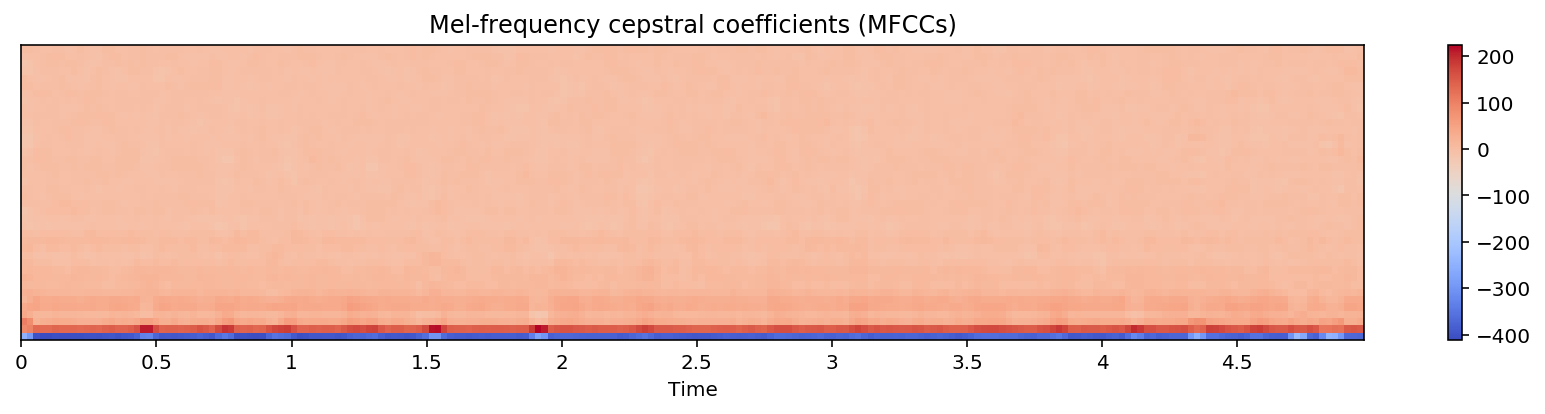

In [48]:
# Visualize the MFCC series
# Mel-frequency cepstral coefficients (MFCCs)
plt.figure(figsize=(12, 3))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients (MFCCs)')
plt.tight_layout()

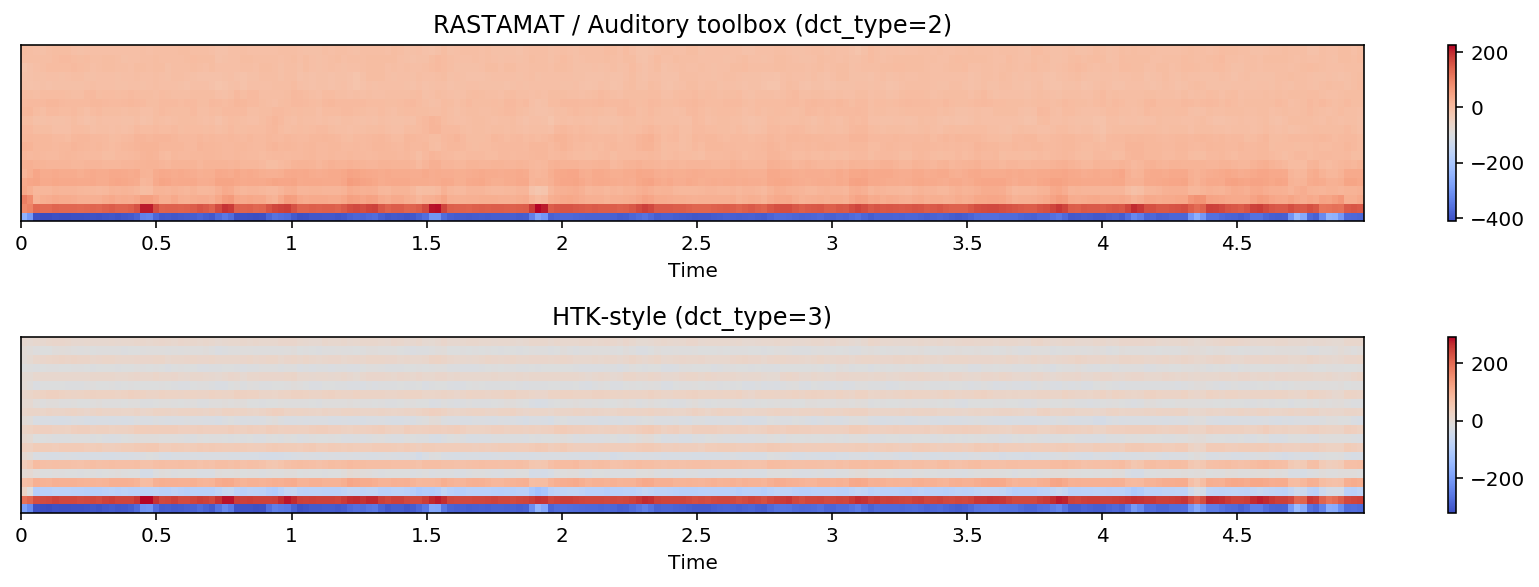

In [49]:
# Compare different DCT bases
m_slaney = librosa.feature.mfcc(y=y, sr=sr, dct_type=2)

#m_dct1 = librosa.feature.mfcc(y=y, sr=sr, dct_type=1)
plt.figure(figsize=(12, 6))
#plt.subplot(3, 1, 1)
#librosa.display.specshow(m_dct1, x_axis='time')
#plt.title('Discrete cosine transform (dct_type=1)')
#plt.colorbar()
m_htk = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
plt.subplot(3, 1, 2)
librosa.display.specshow(m_slaney, x_axis='time')
plt.title('RASTAMAT / Auditory toolbox (dct_type=2)')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(m_htk, x_axis='time')
plt.title('HTK-style (dct_type=3)')
plt.colorbar()
plt.tight_layout()

In [50]:
# Get onset times from a signal
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

array([0.48761905, 0.7662585 , 0.95201814, 1.25387755, 1.55573696,
       1.92725624, 2.32199546, 2.80961451, 3.11147392, 3.57587302,
       3.80807256, 3.85451247, 4.13315193, 4.36535147, 4.59755102,
       4.73687075, 4.85297052])

In [51]:
# use a pre-computed onset envelope
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

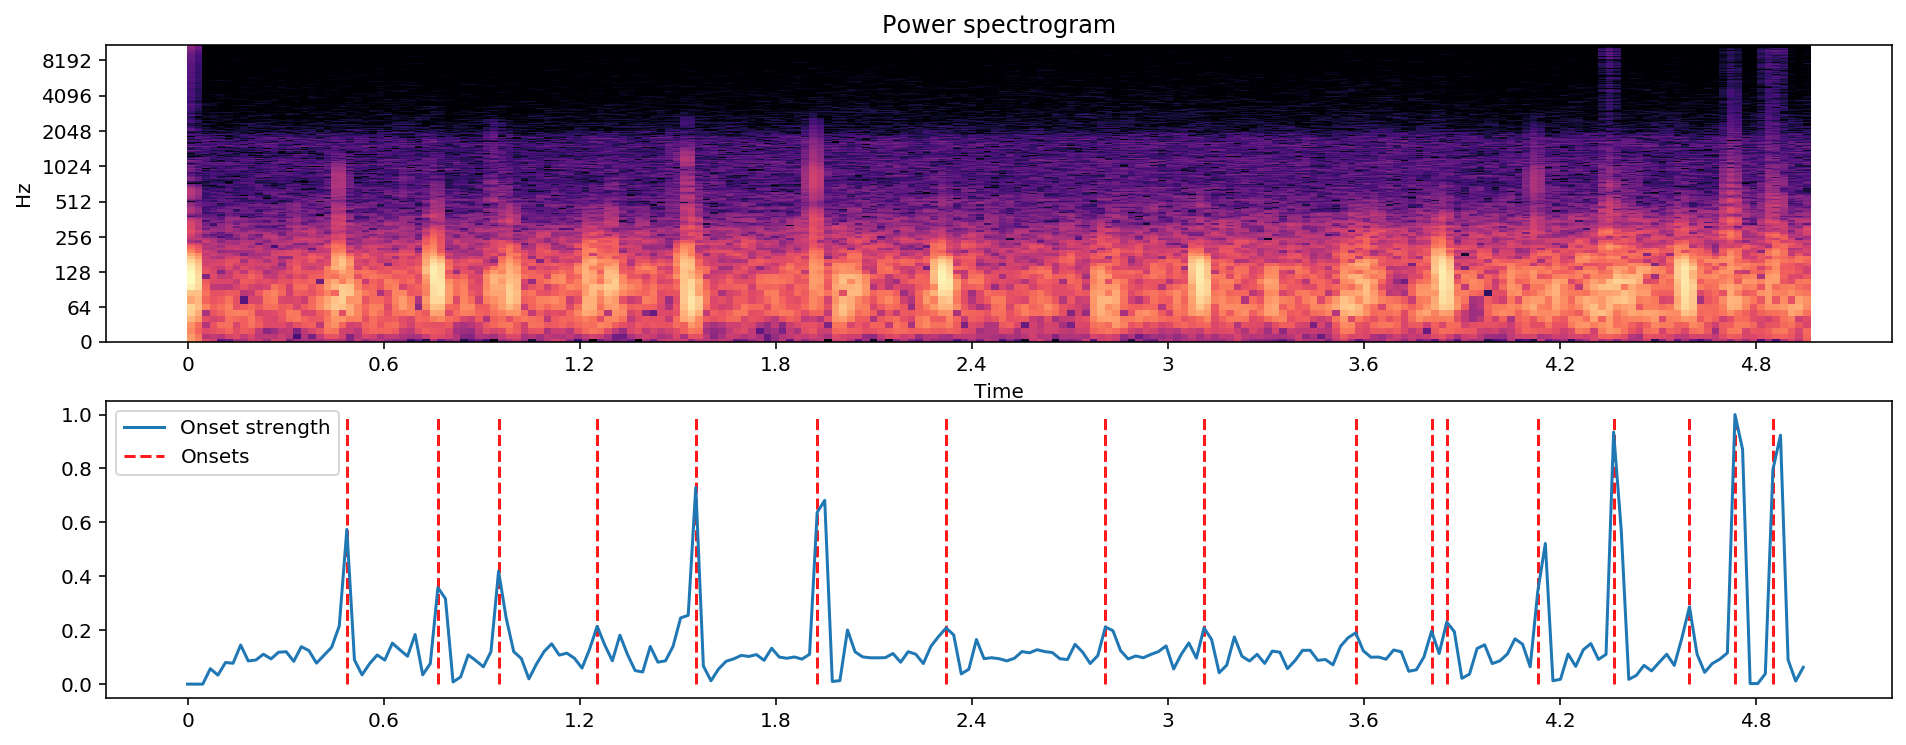

In [52]:
# visualize it
D = np.abs(librosa.stft(y))
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

In [53]:
oenv = librosa.onset.onset_strength(y=y, sr=sr)
# Detect events without backtracking
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)
# Backtrack the events using the onset envelope
onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)
# Backtrack the events using the RMS values
rms = librosa.feature.rms(S=np.abs(librosa.stft(y=y)))
onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])

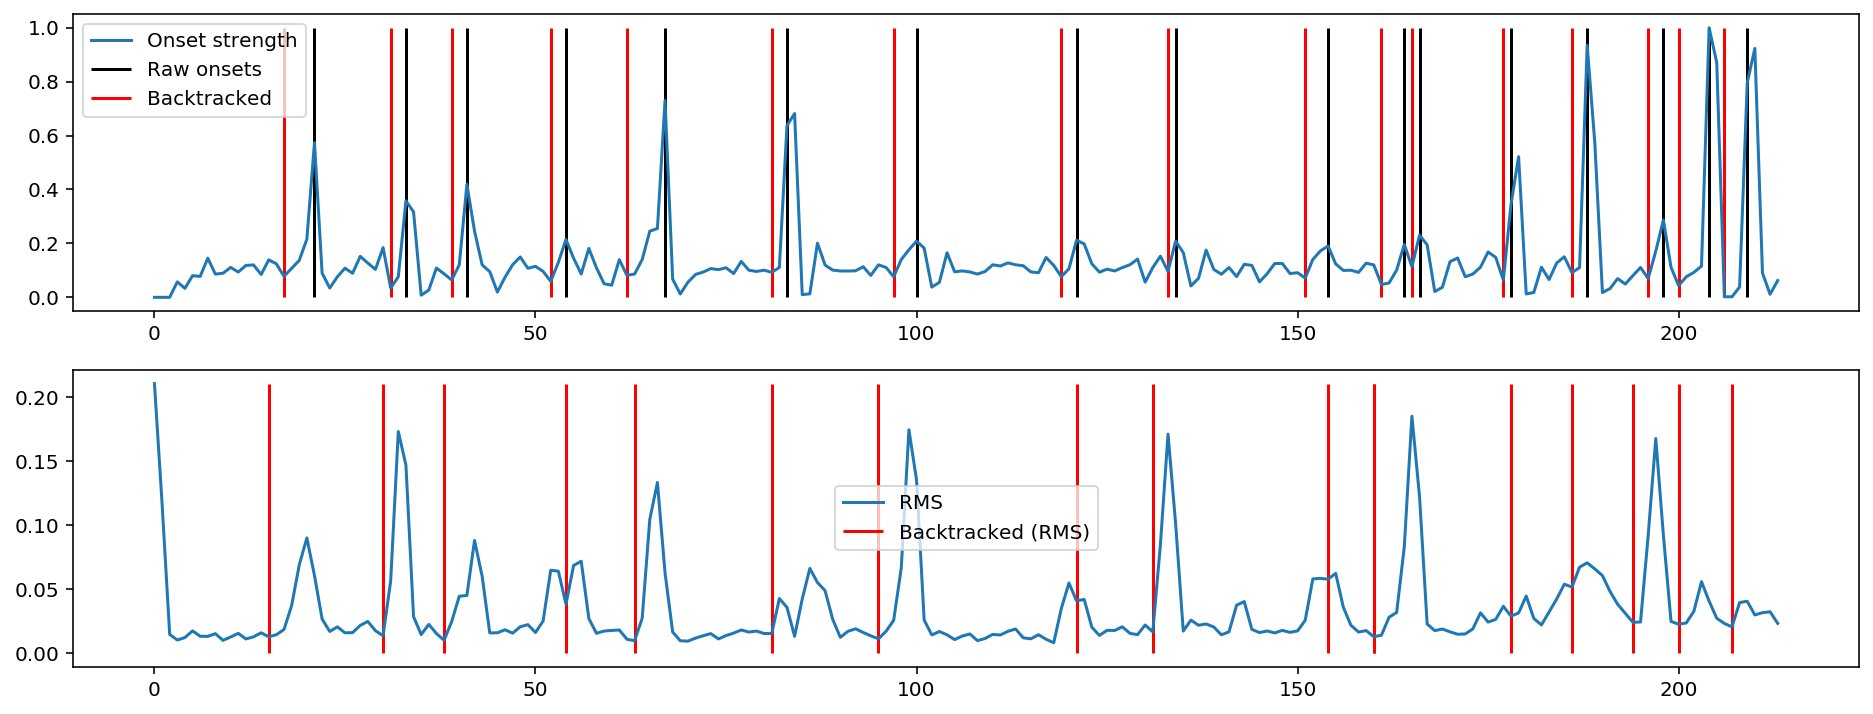

In [54]:
# Plot the results
plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.plot(oenv, label='Onset strength')
plt.vlines(onset_raw, 0, oenv.max(), label='Raw onsets')
plt.vlines(onset_bt, 0, oenv.max(), label='Backtracked', color='r')
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(2,1,2)
plt.plot(rms[0], label='RMS')
plt.vlines(onset_bt_rms, 0, rms.max(), label='Backtracked (RMS)', color='r')
plt.legend(frameon=True, framealpha=0.75)

TypeError: cqt() got an unexpected keyword argument 'n_fft'

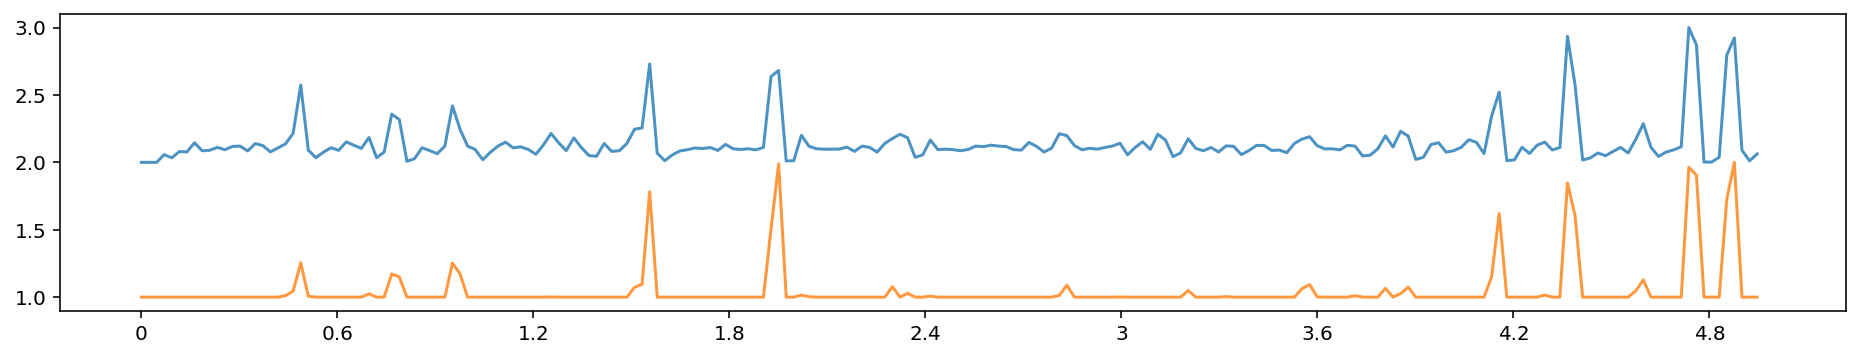

In [55]:
D = np.abs(librosa.stft(y))
times = librosa.frames_to_time(np.arange(D.shape[1]))

plt.figure(figsize=(16, 6))
#ax1 = plt.subplot(2, 1, 1)
#librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),y_axis='log', x_axis='time')
#plt.title('Power spectrogram')

# Construct a standard onset function
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
plt.subplot(2, 1, 1, sharex=ax1)
plt.plot(times, 2 + onset_env / onset_env.max(), alpha=0.8,label='Mean (mel)')

# median
onset_env = librosa.onset.onset_strength(y=y, sr=sr,aggregate=np.median,fmax=8000, n_mels=256)
plt.plot(times, 1+ (onset_env/onset_env.max()), alpha=0.8,label='Median (custom mel)')

# Constant-Q spectrogram instead of Mel
onset_env = librosa.onset.onset_strength(y=y, sr=sr,feature=librosa.cqt)
plt.plot(times, onset_env / onset_env.max(), alpha=0.8,label='Mean (CQT)')
plt.legend(frameon=True, framealpha=0.75)
plt.ylabel('Normalized strength')
plt.yticks([])
plt.axis('tight')
plt.tight_layout()

onset_subbands = librosa.onset.onset_strength_multi(y=y, sr=sr, channels=[0, 32, 64, 96, 128])
#plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 2)
librosa.display.specshow(onset_subbands, x_axis='time')
plt.ylabel('Sub-bands')
plt.title('Sub-band onset strength')

In [56]:
print("Number of training examples=", train_ab.shape[0], "  Number of classes=", len(train_ab.label.unique()))


Number of training examples= 832   Number of classes= 6


In [57]:
def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5

# get audio data without padding highest qualify audio
def load_file_data_without_change(folder,file_names, duration=3, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0) 
        except Exception as e:
            print("Error encountered while parsing file: ", file)
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data


# get audio data with a fix padding may also chop off some file
def load_file_data (folder,file_names, duration=12, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, sr=sr, duration=duration,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            #normalized raw audio 
            # y = audio_norm(y)            
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [58]:
# simple encoding of categories, limited to 3 types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
# {'artifact': 0, 'murmur': 1, 'normal': 3}
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [59]:
# load dataset-a, keep them separate for testing purpose
import os, fnmatch

A_folder=INPUT_DIR+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder,file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]

# test files
A_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'Aunlabelledtest*.wav')
A_unlabelledtest_sounds = load_file_data(folder=A_folder,file_names=A_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for items in A_unlabelledtest_sounds]

print ("loaded dataset-a")

load file  input//set_a/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  input//set_a/artifact__201105280851.wav
fixing audio lenght : artifact__201105280851.wav
load file  input//set_a/artifact__201106010559.wav
fixing audio lenght : artifact__201106010559.wav
load file  input//set_a/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  input//set_a/artifact__201106141701.wav
fixing audio lenght : artifact__201106141701.wav
load file  input//set_a/artifact__201106070537.wav
fixing audio lenght : artifact__201106070537.wav
load file  input//set_a/artifact__201106161016.wav
fixing audio lenght : artifact__201106161016.wav
load file  input//set_a/artifact__201106171003.wav
fixing audio lenght : artifact__201106171003.wav
load file  input//set_a/artifact__201105190800.wav
fixing audio lenght : artifact__201105190800.wav
load file  input//set_a/artifact__201106021541.wav
fixing audio lenght : artifact__201106021541.wav


load file  input//set_a/extrahls__201103150114.wav
fixing audio lenght : extrahls__201103150114.wav
load file  input//set_a/extrahls__201101241433.wav
fixing audio lenght : extrahls__201101241433.wav
load file  input//set_a/extrahls__201101152255.wav
fixing audio lenght : extrahls__201101152255.wav
load file  input//set_a/extrahls__201101160804.wav
fixing audio lenght : extrahls__201101160804.wav
load file  input//set_a/extrahls__201101091153.wav
fixing audio lenght : extrahls__201101091153.wav
load file  input//set_a/extrahls__201103182227.wav
fixing audio lenght : extrahls__201103182227.wav
load file  input//set_a/murmur__201108222256.wav
fixing audio lenght : murmur__201108222256.wav
load file  input//set_a/murmur__201108222242.wav
fixing audio lenght : murmur__201108222242.wav
load file  input//set_a/murmur__201108222243.wav
fixing audio lenght : murmur__201108222243.wav
load file  input//set_a/murmur__201104021355.wav
fixing audio lenght : murmur__201104021355.wav
load file  input

fixing audio lenght : Aunlabelledtest__201106130440.wav
load file  input//set_a/Aunlabelledtest__201106120928.wav
fixing audio lenght : Aunlabelledtest__201106120928.wav
load file  input//set_a/Aunlabelledtest__201102081033.wav
fixing audio lenght : Aunlabelledtest__201102081033.wav
load file  input//set_a/Aunlabelledtest__201106212102.wav
fixing audio lenght : Aunlabelledtest__201106212102.wav
load file  input//set_a/Aunlabelledtest__201103170122.wav
fixing audio lenght : Aunlabelledtest__201103170122.wav
load file  input//set_a/Aunlabelledtest__201106171155.wav
fixing audio lenght : Aunlabelledtest__201106171155.wav
load file  input//set_a/Aunlabelledtest__201103200518.wav
fixing audio lenght : Aunlabelledtest__201103200518.wav
load file  input//set_a/Aunlabelledtest__201106170857.wav
fixing audio lenght : Aunlabelledtest__201106170857.wav
load file  input//set_a/Aunlabelledtest__201106010807.wav
fixing audio lenght : Aunlabelledtest__201106010807.wav
load file  input//set_a/Aunlabel

In [60]:
%%time
# load dataset-b, keep them separate for testing purpose 
B_folder=INPUT_DIR+'/set_b/'
# set-b
B_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'normal*.wav')  # include noisy files
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder,file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

#test files
B_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'Bunlabelledtest*.wav')
B_unlabelledtest_sounds = load_file_data(folder=B_folder,file_names=B_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for items in B_unlabelledtest_sounds]
print ("loaded dataset-b")

load file  input//set_b/normal__232_1308748524018_D1.wav
fixing audio lenght : normal__232_1308748524018_D1.wav
load file  input//set_b/normal__184_1308073010307_D.wav
load file  input//set_b/normal_noisynormal_109_1305653972028_F.wav
fixing audio lenght : normal_noisynormal_109_1305653972028_F.wav
load file  input//set_b/normal_noisynormal_264_1309356143724_B.wav
load file  input//set_b/normal_noisynormal_109_1305653646620_A.wav
load file  input//set_b/normal_noisynormal_173_1307973611151_C1.wav
fixing audio lenght : normal_noisynormal_173_1307973611151_C1.wav
load file  input//set_b/normal_noisynormal_115_1306259437619_B.wav
fixing audio lenght : normal_noisynormal_115_1306259437619_B.wav
load file  input//set_b/normal__210_1308162935880_D2.wav
fixing audio lenght : normal__210_1308162935880_D2.wav
load file  input//set_b/normal_noisynormal_141_1306520154450_A1.wav
fixing audio lenght : normal_noisynormal_141_1306520154450_A1.wav
load file  input//set_b/normal__300_1311772096120_C1.w

load file  input//set_b/normal_noisynormal_118_1306262335509_C1.wav
fixing audio lenght : normal_noisynormal_118_1306262335509_C1.wav
load file  input//set_b/normal_noisynormal_144_1306522408528_C.wav
fixing audio lenght : normal_noisynormal_144_1306522408528_C.wav
load file  input//set_b/normal_noisynormal_144_1306522408528_A1.wav
fixing audio lenght : normal_noisynormal_144_1306522408528_A1.wav
load file  input//set_b/normal_noisynormal_146_1306778707532_D.wav
load file  input//set_b/normal__210_1308162935880_B1.wav
fixing audio lenght : normal__210_1308162935880_B1.wav
load file  input//set_b/normal__252_1309203336604_B.wav
fixing audio lenght : normal__252_1309203336604_B.wav
load file  input//set_b/normal_noisynormal_105_1305033453095_C.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_C.wav
load file  input//set_b/normal__134_1306428161797_C2.wav
fixing audio lenght : normal__134_1306428161797_C2.wav
load file  input//set_b/normal_noisynormal_176_1307988171173_D.wav


fixing audio lenght : normal__204_1308159229275_C.wav
load file  input//set_b/normal_noisynormal_130_1306347376079_B.wav
fixing audio lenght : normal_noisynormal_130_1306347376079_B.wav
load file  input//set_b/normal__106_1306776721273_B1.wav
fixing audio lenght : normal__106_1306776721273_B1.wav
load file  input//set_b/normal__155_1306935902813_B1.wav
fixing audio lenght : normal__155_1306935902813_B1.wav
load file  input//set_b/normal__232_1308748524018_A.wav
fixing audio lenght : normal__232_1308748524018_A.wav
load file  input//set_b/normal__261_1309353556003_B.wav
fixing audio lenght : normal__261_1309353556003_B.wav
load file  input//set_b/normal__191_1308077299430_B.wav
load file  input//set_b/normal__125_1306332456645_B.wav
fixing audio lenght : normal__125_1306332456645_B.wav
load file  input//set_b/normal__209_1308162216750_A1.wav
fixing audio lenght : normal__209_1308162216750_A1.wav
load file  input//set_b/normal_noisynormal_106_1306776721273_A.wav
fixing audio lenght : nor

fixing audio lenght : normal__106_1306776721273_C1.wav
load file  input//set_b/normal_noisynormal_133_1306759619127_B1.wav
fixing audio lenght : normal_noisynormal_133_1306759619127_B1.wav
load file  input//set_b/normal__168_1307970069434_A2.wav
fixing audio lenght : normal__168_1307970069434_A2.wav
load file  input//set_b/normal_noisynormal_169_1307970398039_A.wav
fixing audio lenght : normal_noisynormal_169_1307970398039_A.wav
load file  input//set_b/normal__137_1306764999211_D.wav
fixing audio lenght : normal__137_1306764999211_D.wav
load file  input//set_b/normal_noisynormal_125_1306332456645_C.wav
fixing audio lenght : normal_noisynormal_125_1306332456645_C.wav
load file  input//set_b/normal__170_1307970562729_C.wav
fixing audio lenght : normal__170_1307970562729_C.wav
load file  input//set_b/normal_noisynormal_110_1305655332337_B.wav
fixing audio lenght : normal_noisynormal_110_1305655332337_B.wav
load file  input//set_b/normal_noisynormal_125_1306332456645_A1.wav
fixing audio le

fixing audio lenght : normal_noisynormal_117_1306262456650_D.wav
load file  input//set_b/murmur__293_1311680805936_B1.wav
fixing audio lenght : murmur__293_1311680805936_B1.wav
load file  input//set_b/murmur__240_1309201366049_B.wav
fixing audio lenght : murmur__240_1309201366049_B.wav
load file  input//set_b/murmur__200_1308144251434_C.wav
fixing audio lenght : murmur__200_1308144251434_C.wav
load file  input//set_b/murmur_noisymurmur_165_1307109069581_C1.wav
fixing audio lenght : murmur_noisymurmur_165_1307109069581_C1.wav
load file  input//set_b/murmur__200_1308144251434_D.wav
fixing audio lenght : murmur__200_1308144251434_D.wav
load file  input//set_b/murmur__171_1307971016233_D.wav
fixing audio lenght : murmur__171_1307971016233_D.wav
load file  input//set_b/murmur__193_1308078104592_C1.wav
fixing audio lenght : murmur__193_1308078104592_C1.wav
load file  input//set_b/murmur_noisymurmur_292_1311185449649_D.wav
fixing audio lenght : murmur_noisymurmur_292_1311185449649_D.wav
load 

load file  input//set_b/murmur__193_1308078104592_B.wav
fixing audio lenght : murmur__193_1308078104592_B.wav
load file  input//set_b/murmur__203_1308162026258_D.wav
fixing audio lenght : murmur__203_1308162026258_D.wav
load file  input//set_b/murmur_noisymurmur_272_1309370164386_C.wav
fixing audio lenght : murmur_noisymurmur_272_1309370164386_C.wav
load file  input//set_b/murmur__165_1307109069581_C2.wav
fixing audio lenght : murmur__165_1307109069581_C2.wav
load file  input//set_b/murmur__254_1309350589009_A1.wav
fixing audio lenght : murmur__254_1309350589009_A1.wav
load file  input//set_b/murmur_noisymurmur_160_1307100683334_D.wav
fixing audio lenght : murmur_noisymurmur_160_1307100683334_D.wav
load file  input//set_b/murmur__245_1309200438094_B.wav
fixing audio lenght : murmur__245_1309200438094_B.wav
load file  input//set_b/murmur__276_1311162716489_C.wav
fixing audio lenght : murmur__276_1311162716489_C.wav
load file  input//set_b/murmur__281_1311165683454_D.wav
load file  input

fixing audio lenght : Bunlabelledtest__163_1307104470471_D.wav
load file  input//set_b/Bunlabelledtest__220_1308250132896_A.wav
fixing audio lenght : Bunlabelledtest__220_1308250132896_A.wav
load file  input//set_b/Bunlabelledtest__145_1307987561278_D.wav
fixing audio lenght : Bunlabelledtest__145_1307987561278_D.wav
load file  input//set_b/Bunlabelledtest__136_1306429977501_D.wav
fixing audio lenght : Bunlabelledtest__136_1306429977501_D.wav
load file  input//set_b/Bunlabelledtest__103_1305031931979_A.wav
fixing audio lenght : Bunlabelledtest__103_1305031931979_A.wav
load file  input//set_b/Bunlabelledtest__245_1309200438094_C.wav
fixing audio lenght : Bunlabelledtest__245_1309200438094_C.wav
load file  input//set_b/Bunlabelledtest__128_1306344005749_C.wav
fixing audio lenght : Bunlabelledtest__128_1306344005749_C.wav
load file  input//set_b/Bunlabelledtest__159_1307018640315_B.wav
fixing audio lenght : Bunlabelledtest__159_1307018640315_B.wav
load file  input//set_b/Bunlabelledtest__

load file  input//set_b/Bunlabelledtest__137_1306764999211_D2.wav
fixing audio lenght : Bunlabelledtest__137_1306764999211_D2.wav
load file  input//set_b/Bunlabelledtest__180_1307990956284_B.wav
load file  input//set_b/Bunlabelledtest__268_1309368960960_A.wav
fixing audio lenght : Bunlabelledtest__268_1309368960960_A.wav
load file  input//set_b/Bunlabelledtest__260_1309353164458_A.wav
fixing audio lenght : Bunlabelledtest__260_1309353164458_A.wav
load file  input//set_b/Bunlabelledtest__169_1307970398039_C1.wav
fixing audio lenght : Bunlabelledtest__169_1307970398039_C1.wav
load file  input//set_b/Bunlabelledtest__217_1308246111629_B.wav
fixing audio lenght : Bunlabelledtest__217_1308246111629_B.wav
load file  input//set_b/Bunlabelledtest__106_1306776721273_B.wav
fixing audio lenght : Bunlabelledtest__106_1306776721273_B.wav
load file  input//set_b/Bunlabelledtest__162_1307101835989_C.wav
fixing audio lenght : Bunlabelledtest__162_1307101835989_C.wav
load file  input//set_b/Bunlabelled

fixing audio lenght : Bunlabelledtest__109_1305653972028_B.wav
load file  input//set_b/Bunlabelledtest__186_1308073648738_C.wav
fixing audio lenght : Bunlabelledtest__186_1308073648738_C.wav
load file  input//set_b/Bunlabelledtest__171_1307971016233_F.wav
fixing audio lenght : Bunlabelledtest__171_1307971016233_F.wav
load file  input//set_b/Bunlabelledtest__262_1309355283807_B.wav
fixing audio lenght : Bunlabelledtest__262_1309355283807_B.wav
load file  input//set_b/Bunlabelledtest__149_1306776016110_C.wav
fixing audio lenght : Bunlabelledtest__149_1306776016110_C.wav
load file  input//set_b/Bunlabelledtest__172_1307971284351_D.wav
load file  input//set_b/Bunlabelledtest__150_1306776340746_D.wav
fixing audio lenght : Bunlabelledtest__150_1306776340746_D.wav
load file  input//set_b/Bunlabelledtest__209_1308162216750_C.wav
fixing audio lenght : Bunlabelledtest__209_1308162216750_C.wav
load file  input//set_b/Bunlabelledtest__148_1306768801551_C.wav
fixing audio lenght : Bunlabelledtest__

In [61]:
#combine set-a and set-b 
x_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extrahls_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))

y_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extrahls_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extrastole_labels))

test_x = np.concatenate((A_unlabelledtest_sounds,B_unlabelledtest_sounds))
test_y = np.concatenate((A_unlabelledtest_labels,B_unlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


In [62]:
import keras
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
# random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

seed = 1000
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.9, random_state=seed, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.9, random_state=seed, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(keras.utils.to_categorical(test_y, len(CLASSES)))

In [63]:
print ("label shape: ", y_data.shape)
print ("data size of the array: : %s" % y_data.size)
print ("length of one array element in bytes: ", y_data.itemsize)
print ("total bytes consumed by the elements of the array: ", y_data.nbytes)
print (y_data[1])
print ("")
print ("audio data shape: ", x_data.shape)
print ("data size of the array: : %s" % x_data.size)
print ("length of one array element in bytes: ", x_data.itemsize)
print ("total bytes consumed by the elements of the array: ", x_data.nbytes)
#print (x_data[1])
print ("")
print ("training data shape: ", x_train.shape)
print ("training label shape: ", y_train.shape)
print ("")
print ("validation data shape: ", x_val.shape)
print ("validation label shape: ", y_val.shape)
print ("")
print ("test data shape: ", x_test.shape)
print ("test label shape: ", y_test.shape)

label shape:  (585,)
data size of the array: : 585
length of one array element in bytes:  8
total bytes consumed by the elements of the array:  4680
0

audio data shape:  (585, 40, 1)
data size of the array: : 23400
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  93600

training data shape:  (473, 40, 1)
training label shape:  (473, 3)

validation data shape:  (53, 40, 1)
validation label shape:  (53, 3)

test data shape:  (59, 40, 1)
test label shape:  (59, 3)


In [64]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools

In [65]:
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.20, return_sequences=True,input_shape = (40,1)))
model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.20, return_sequences=False))
model.add(Dense(len(CLASSES), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc','mse', 'mae', 'mape', 'cosine'])
model.summary()

Build LSTM RNN model ...
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 64)            16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 29,411
Trainable params: 29,411
Non-trainable params: 0
_________________________________________________________________


In [66]:
%%time
# saved model checkpoint file
best_model_file="./best_model_trained.hdf5"
#train_model_file=file_path+"/checkpoints/weights.best_{epoch:02d}-{loss:.2f}.hdf5"
MAX_PATIENT=12
MAX_EPOCHS=100
MAX_BATCH=32

# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]

print ("training started..... please wait.")
# training
history=model.fit(x_train, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(x_val, y_val),
                  callbacks=callback) 

print ("training finised!")

training started..... please wait.
Instructions for updating:
Use tf.cast instead.

Epoch 00001: loss improved from inf to 0.90904, saving model to ./best_model_trained.hdf5

Epoch 00002: loss improved from 0.90904 to 0.82773, saving model to ./best_model_trained.hdf5

Epoch 00003: loss improved from 0.82773 to 0.76007, saving model to ./best_model_trained.hdf5

Epoch 00004: loss improved from 0.76007 to 0.74511, saving model to ./best_model_trained.hdf5

Epoch 00005: loss improved from 0.74511 to 0.70112, saving model to ./best_model_trained.hdf5

Epoch 00006: loss did not improve from 0.70112

Epoch 00007: loss improved from 0.70112 to 0.69075, saving model to ./best_model_trained.hdf5

Epoch 00008: loss did not improve from 0.69075

Epoch 00009: loss did not improve from 0.69075

Epoch 00010: loss improved from 0.69075 to 0.67580, saving model to ./best_model_trained.hdf5

Epoch 00011: loss improved from 0.67580 to 0.66110, saving model to ./best_model_trained.hdf5

Epoch 00012: los

In [67]:
#Model Evaluation

# Keras reported accuracy:
score = model.evaluate(x_train, y_train, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = model.evaluate(x_test, y_test, verbose=0) 
print ("model test data score        : ",round(score[1]*100) , "%")

score = model.evaluate(x_val, y_val, verbose=0) 
print ("model validation data score  : ", round(score[1]*100), "%")

score = model.evaluate(test_x, test_y, verbose=0) 
print ("model unlabeled data score   : ", round(score[1]*100), "%")

model train data score       :  72 %
model test data score        :  68 %
model validation data score  :  75 %
model unlabeled data score   :  76 %


<Figure size 1584x720 with 0 Axes>

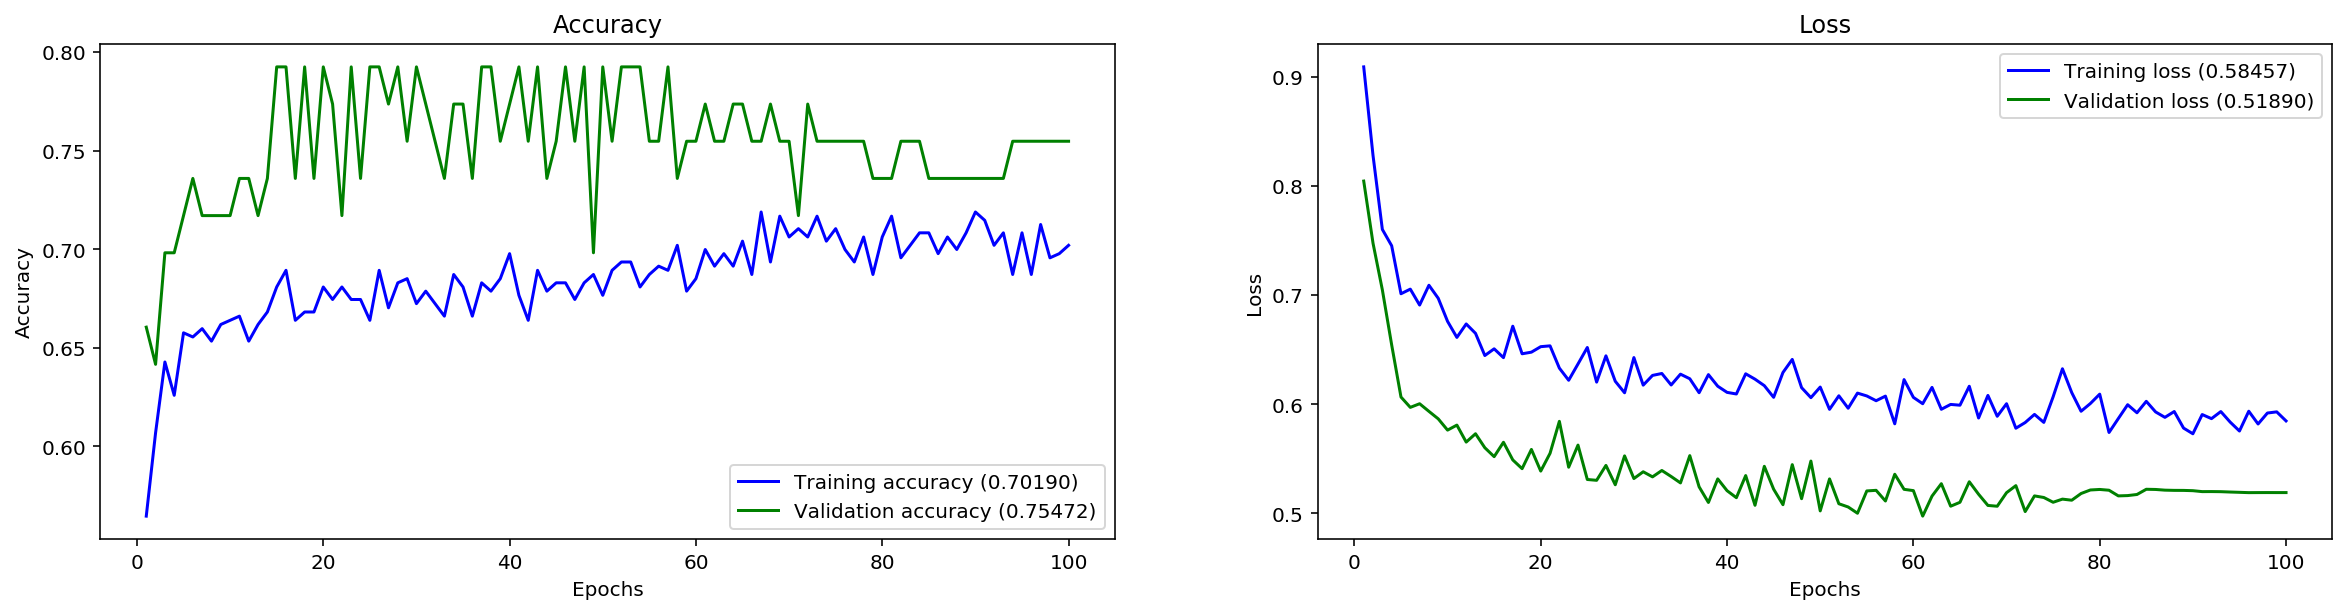

CPU times: user 511 ms, sys: 14.7 ms, total: 526 ms
Wall time: 524 ms


In [68]:
%%time
#Plot Keras History
#Plot loss and accuracy for the training and validation set.
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    plt.figure(figsize=(22,10))
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Accuracy
    plt.figure(221, figsize=(20,10))
    ## Accuracy
    # plt.figure(2,figsize=(14,5))
    plt.subplot(221, title='Accuracy')
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    ## Loss
    plt.subplot(222, title='Loss')
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# plot history
plot_history(history)

In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [70]:
# prediction class 
y_pred = model.predict_classes(x_test, batch_size=32)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

prediction test return : 2 - normal


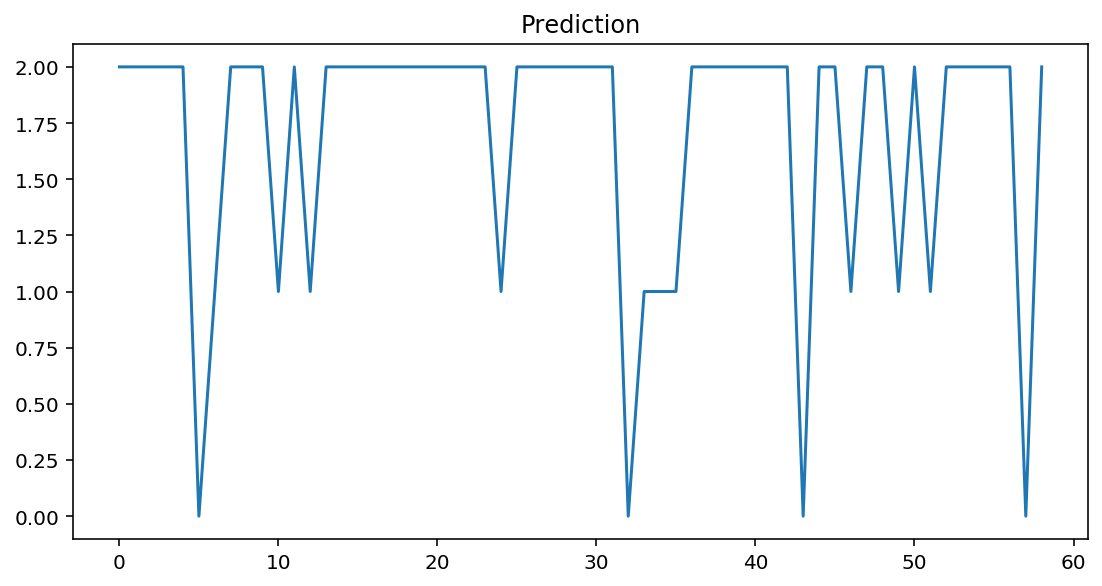

In [71]:
plt.figure(1,figsize=(20,10))
# plot Classification Metrics: Accuracy 
plt.subplot(221, title='Prediction')
plt.plot(y_pred)
plt.show()

In [72]:
print (best_model_file)


./best_model_trained.hdf5


In [73]:
### Loading a Check-Pointed Neural Network Model
# How to load and use weights from a checkpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.35, return_sequences=True,input_shape = (40,1)))
model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(len(CLASSES), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc','mse', 'mae', 'mape', 'cosine'])
model.summary()
# load weights
model.load_weights(best_model_file)
# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

Build LSTM RNN model ...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 40, 64)            16896     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 29,411
Trainable params: 29,411
Non-trainable params: 0
_________________________________________________________________
Created model and loaded weights from file


In [74]:
# make a prediction
y_pred = model.predict_classes(x_test, batch_size=32)
#check scores
scores = model.evaluate(x_test, y_test, verbose=0)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

Model evaluation accuracy:  79 %
